In [9]:
from toolkit.logger import Logger
from toolkit.classes import DataFrameCreator
from toolkit.pytorch_tools import CustomImageDataLoader
from toolkit.pytorch_tools import NeuralNetwork
from torchvision.transforms import Compose
from torchvision.transforms import Resize
from torchvision.transforms import CenterCrop
from torchvision.transforms import ToPILImage
from torchvision.transforms import ToTensor
from torchvision.transforms import RandomHorizontalFlip
from torchvision.transforms import RandomVerticalFlip
from torchvision.transforms import RandomRotation
from torchvision.transforms import RandomPerspective

import torch
import gc

In [2]:
torch.cuda.empty_cache()
gc.collect()
logger = Logger(__name__).get_logger()

In [3]:
data = DataFrameCreator()

In [4]:
data.load_dataset("./data/raw")
data.info()

[    INFO    ] DataFrame created from data/raw/Validation as validation data
[    INFO    ] DataFrame created from data/raw/Train as train data
[    INFO    ] DataFrame created from data/raw/Test as test data
[    INFO    ] Dataset loaded from data/raw folder
[    INFO    ] Name :          train
[    INFO    ] Type:           ('train',)
[    INFO    ] Columns:        ('path', 'filename', 'file', 'type', 'category', 'cat_idx')
[    INFO    ] Shape:          (300, 6)
[    INFO    ] Categories:     ('Non defective', 'Defective')
[    INFO    ] Path:           (PosixPath('data/raw/Train/Non defective'), PosixPath('data/raw/Train/Defective'))
[    INFO    ] File types:     ('jpg',)
[    INFO    ] Name :          validation
[    INFO    ] Type:           ('validation',)
[    INFO    ] Columns:        ('path', 'filename', 'file', 'type', 'category', 'cat_idx')
[    INFO    ] Shape:          (62, 6)
[    INFO    ] Categories:     ('Non defective', 'Defective')
[    INFO    ] Path:           (P

In [14]:
transform = {
    "train": Compose(
        [
            ToPILImage(),
            RandomHorizontalFlip(),
            RandomVerticalFlip(),
            RandomRotation(degrees=(0, 360)),
            RandomPerspective(),
            Resize((227, 227)),
            CenterCrop((227, 227)),
            ToTensor(),
        ]
    ),
    "validation": Compose(
        [ToPILImage(), Resize((227, 227)), CenterCrop((227, 227)), ToTensor()]
    ),
    "test": Compose(
        [ToPILImage(), Resize((227, 227)), CenterCrop((227, 227)), ToTensor()]
    ),
}
target_transform = {"train": None, "validation": None, "test": None}

loader = CustomImageDataLoader(
    dataset=data,
    image_col="file",
    label_col="cat_idx",
    transform=transform,
    target_transform=target_transform,
)
loader.create_dataloaders(batch_size=8)

[    INFO    ] CustomImageDataSet created
[    INFO    ] Setting dataloader subprocesses to 8
[    INFO    ] Dataloaders created


In [15]:
model = NeuralNetwork(name="AlexNet")
model.init_device()

[    INFO    ] Neural Network consutructed: AlexNet
[    INFO    ] NeuralNetwork(
  (layers): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (13): Flatten(start_dim=1, end_dim=-1)
    (14): Linear(in_features=9216, out_features=4096, bias=True)
    (15): ReLU()
    (16): Dropout(p=0.5, inplace=False)
    (17): Linear(in_feature

In [16]:
epochs = 50

model.train(epochs=epochs, train_loader=loader["train"], validation_loader=loader["validation"])

[    INFO    ] Model training started
[    INFO    ] Epoch:    0 Loss:  0.6935 Accuracy  0.4704  Validation loss:  0.6932   Validation accuracy:  0.5885


KeyboardInterrupt: 

In [ ]:
model.results.data

,loss,accuracy,validation_loss,validation_acc
0,0.693187,0.500000,0.692889,0.567708
1,0.693407,0.500000,0.693539,0.468750
2,0.693050,0.493421,0.692529,0.562500
3,0.692947,0.513158,0.693443,0.442708
4,0.692888,0.493421,0.693053,0.567708
5,0.692618,0.559211,0.693343,0.541667
6,0.692519,0.526316,0.692493,0.536458
7,0.692039,0.582237,0.692273,0.546875
8,0.691100,0.608553,0.691694,0.479167
9,0.690364,0.559211,0.689413,0.515625


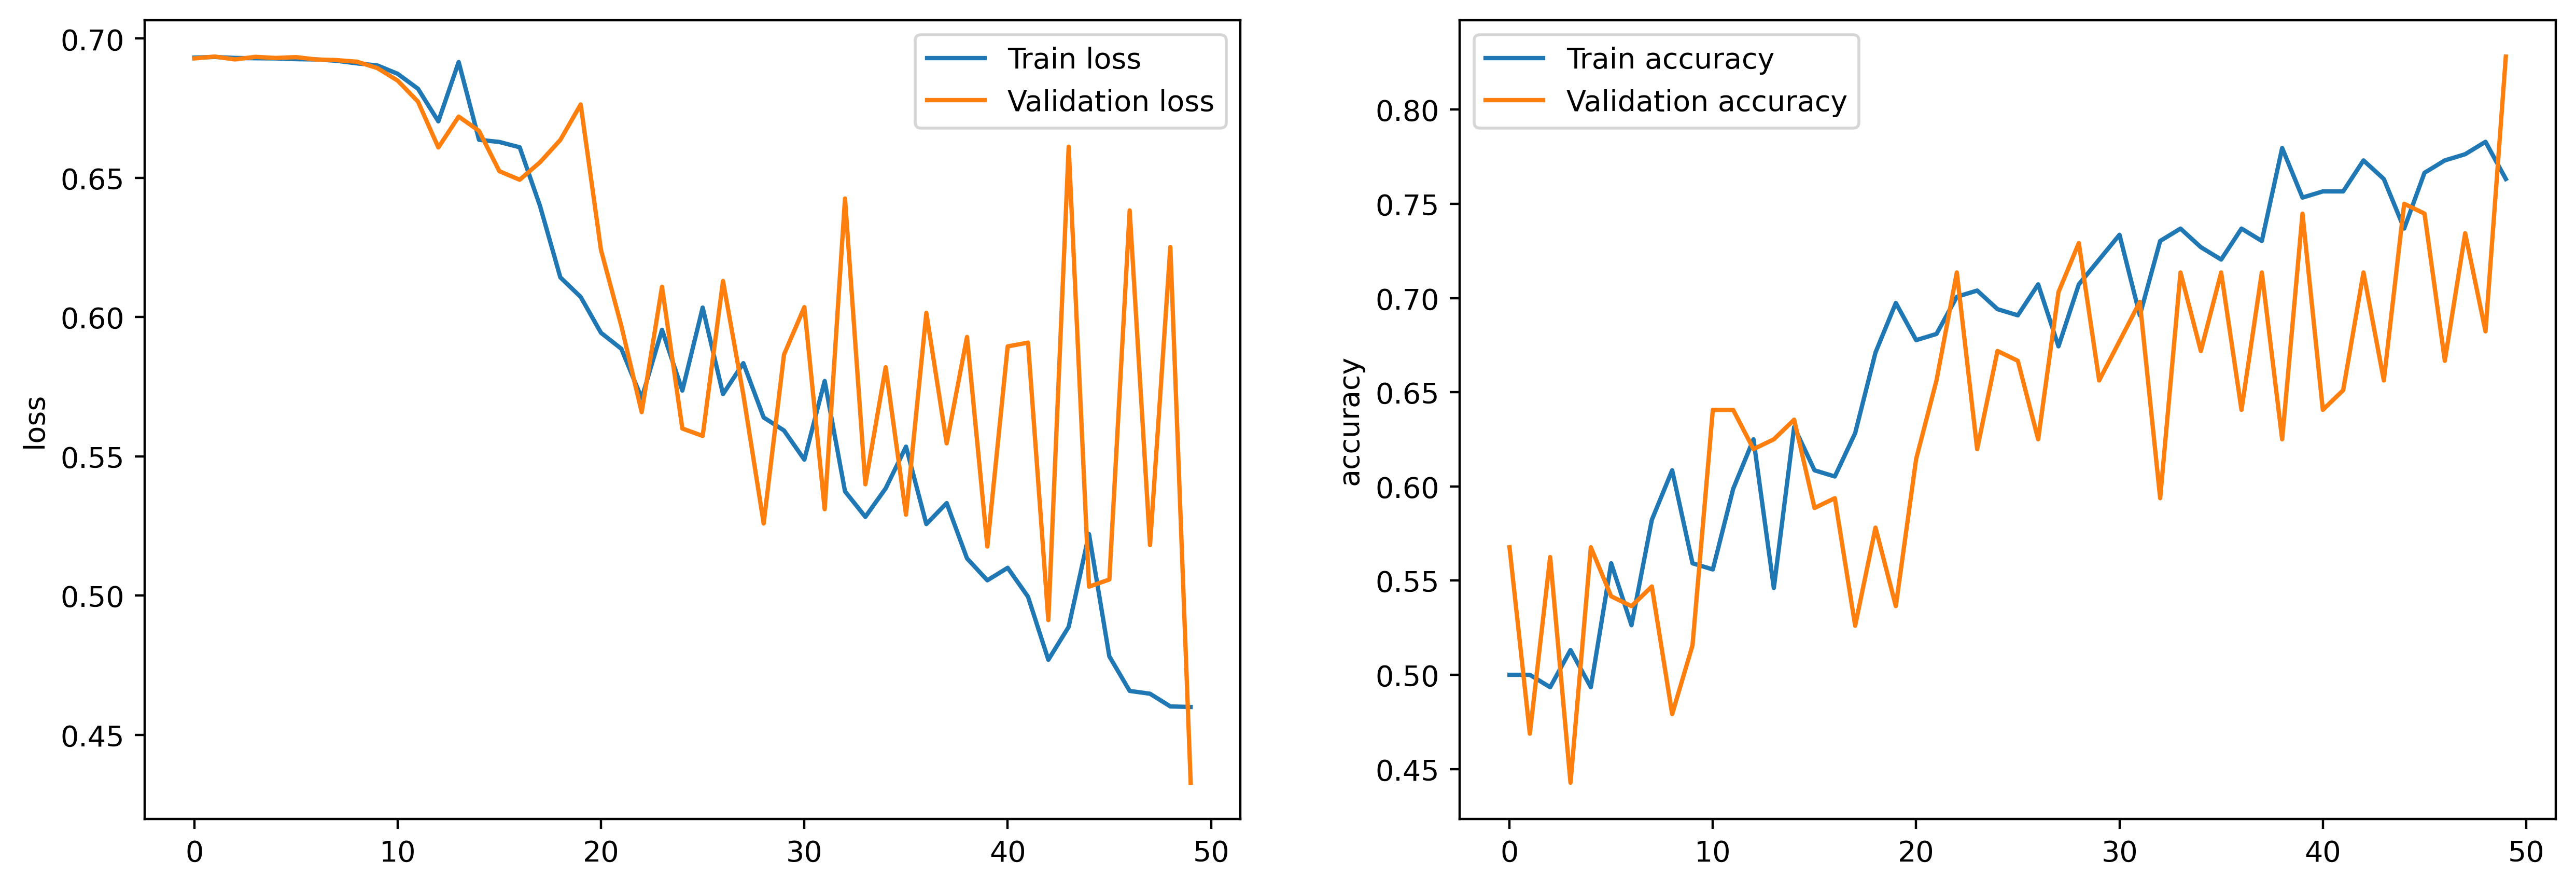

In [ ]:
model.results.plot()